## Part 1

<font face = "Tahoma" size = 3> 
    Find predictors of influence
The dataset for Part I can be found <a href = http://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network> here</a>. 
Use the training dataset only to build and validate your model. Each observation in the dataset describes two individuals, A and B.<br><br>
    There are 11 variables for each person based on Twitter activity, e.g., number of followers, retweets, network characteristics, etc. <br><br>Each observation shows whether A > B (Choice = “1”) or B > A (Choice = “0”). 


In [43]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<font face = "Tahoma" size = 3> Read data and feature processing

In [44]:
df = pd.read_csv('train.csv')
df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

<font face = "Tahoma" size = 3> Business hypothesis
<br><br>
The features that might be indicative of social media influence are :
- Follower counts 
- Listed counts 
- Mentions received 
- Retweets received
- Number of posts
- Network features 1,2 and 3


In [45]:
diff_cols = ['Diff_follower_count', 'Diff_following_count', 'Diff_listed_count', 'Diff_mentions_received', 
        'Diff_retweets_received', 'Diff_mentions_sent', 'Diff_retweets_sent', 'Diff_posts', 
        'Diff_network_feature_1', 'Diff_network_feature_2', 'Diff_network_feature_3']

#Initialize difference columns
for i in range(len(diff_cols)):
    df[diff_cols[i]] = 0
for i in range(len(diff_cols)):
    df[diff_cols[i]] = df.iloc[i,i+1]-df.iloc[:,i+1+len(diff_cols)]

In [46]:
ratio_cols = ['Ratio_follower_count', 'Ratio_following_count', 'Ratio_listed_count', 'Ratio_mentions_received', 
        'Ratio_retweets_received', 'Ratio_mentions_sent', 'Ratio_retweets_sent', 'Ratio_posts', 
        'Ratio_network_feature_1', 'Ratio_network_feature_2', 'Ratio_network_feature_3']

#Initialize difference columns
for i in range(len(ratio_cols)):
    df[ratio_cols[i]] = 0
for i in range(len(ratio_cols)):
    df[ratio_cols[i]] = df.iloc[i,i+1]-df.iloc[:,i+1+len(ratio_cols)]

In [47]:
#Analysis on difference columns
df2 = pd.concat([pd.DataFrame(df['Choice']), df.iloc[:,23:]], axis = 1)
df2.head(10)

,Choice,Diff_follower_count,Diff_following_count,Diff_listed_count,Diff_mentions_received,Diff_retweets_received,Diff_mentions_sent,Diff_retweets_sent,Diff_posts,Diff_network_feature_1,...,Ratio_following_count,Ratio_listed_count,Ratio_mentions_received,Ratio_retweets_received,Ratio_mentions_sent,Ratio_retweets_sent,Ratio_posts,Ratio_network_feature_1,Ratio_network_feature_2,Ratio_network_feature_3
0,0,-34235,-28629,-1588,-7.739674,33.014855,-8.103828,-0.231920,-0.182770,21612,...,-28629,-1588,-7.739674,33.014855,-8.103828,-0.231920,-0.182770,21612,200.966213,-1905.893939
1,0,-39034,331,-1509,-32.804197,28.055277,-3.127174,-0.463839,5.735725,21515,...,331,-1509,-32.804197,28.055277,-3.127174,-0.463839,5.735725,21515,144.465841,-2920.515337
2,0,-3394,697,-105,6.956128,36.644505,-0.502699,0.000000,6.202843,21675,...,697,-105,6.956128,36.644505,-0.502699,0.000000,6.202843,21675,266.163182,-266.333333
3,0,-19334,-16458,-177,-565.184032,-353.294797,-27.451537,-7.067053,-25.295861,19916,...,-16458,-177,-565.184032,-353.294797,-27.451537,-7.067053,-25.295861,19916,253.027220,-1384.845634
4,1,-7326,-532,-80,-13.911042,33.417223,-6.664154,-1.019223,2.242799,21593,...,-532,-80,-13.911042,33.417223,-6.664154,-1.019223,2.242799,21593,227.996516,-1982.627907
5,0,-10919,-321,-373,-32.901689,31.075875,-19.547561,-1.761262,-5.454984,21550,...,-321,-373,-32.901689,31.075875,-19.547561,-1.761262,-5.454984,21550,169.064697,-2470.136364
6,0,-185388,178,-15016,-258.323050,-17.346347,-13.011400,-0.234262,-6.859127,20750,...,178,-15016,-258.323050,-17.346347,-13.011400,-0.234262,-6.859127,20750,103.510287,-5310.646186
7,1,-7892,469,-858,0.322181,34.910509,-1.498295,-0.495309,5.473196,21649,...,469,-858,0.322181,34.910509,-1.498295,-0.495309,5.473196,21649,70.963182,-4291.466667
8,1,-298440,628,-6108,-485.565556,-169.661668,-4.014709,-0.754036,3.730582,19657,...,628,-6108,-485.565556,-169.661668,-4.014709,-0.754036,3.730582,19657,200.526418,-3854.446569
9,0,-117685,-120,-9849,-182.064406,-30.311339,-11.194327,-2.466766,-4.127721,20887,...,-120,-9849,-182.064406,-30.311339,-11.194327,-2.466766,-4.127721,20887,90.954483,-5524.939774


In [48]:
# x = df2.loc[:,cols].values
# x = StandardScaler().fit_transform(x)
# pca = PCA(n_components=5)
# pcs = pca.fit_transform(x)
# pcs

<font face = "Tahoma" size = 3> Normalize data and create train test split
<br><br>

In [49]:
array3 = df2.loc[:,diff_cols].values
array3 = StandardScaler().fit_transform(array3)
df3 = pd.DataFrame(array3, columns = diff_cols)
df3 = df3.round(4)
df3.head(10)

,Diff_follower_count,Diff_following_count,Diff_listed_count,Diff_mentions_received,Diff_retweets_received,Diff_mentions_sent,Diff_retweets_sent,Diff_posts,Diff_network_feature_1,Diff_network_feature_2,Diff_network_feature_3
0,0.3013,-0.3411,0.2586,0.1012,0.1063,-0.2163,0.3989,0.1296,0.1938,0.0890,0.3313
1,0.2991,0.2376,0.2634,0.1002,0.1058,0.2952,0.2794,0.4343,0.1902,-0.4406,0.1475
2,0.3156,0.2449,0.3496,0.1018,0.1067,0.5650,0.5185,0.4584,0.1961,0.7001,0.6285
3,0.3082,-0.0979,0.3452,0.0790,0.0650,-2.2051,-3.1248,-1.1634,0.1304,0.5770,0.4258
4,0.3138,0.2203,0.3511,0.1010,0.1064,-0.0684,-0.0070,0.2545,0.1931,0.3424,0.3174
5,0.3121,0.2245,0.3331,0.1002,0.1061,-1.3926,-0.3895,-0.1419,0.1915,-0.2100,0.2291
6,0.2314,0.2345,-0.5654,0.0912,0.1009,-0.7208,0.3977,-0.2141,0.1616,-0.8245,-0.2857
7,0.3135,0.2403,0.3034,0.1015,0.1065,0.4626,0.2631,0.4208,0.1952,-1.1296,-0.1010
8,0.1790,0.2435,-0.0188,0.0822,0.0846,0.2040,0.1298,0.3311,0.1208,0.0849,-0.0218
9,0.2627,0.2286,-0.2483,0.0943,0.0995,-0.5340,-0.7532,-0.0735,0.1667,-0.9422,-0.3245


In [50]:
df3['Choice'] = df2['Choice']
X_train, y_train = df3[diff_cols].values , df3['Choice'].values

In [51]:
#Logistic regression to understand drivers of influence for A
# model = LogisticRegression(solver='liblinear', random_state=0)

#Stats model for p-values with all data
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.635451
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5500
Model:                          Logit   Df Residuals:                     5489
Method:                           MLE   Df Model:                           10
Date:                Tue, 08 Feb 2022   Pseudo R-squ.:                 0.08300
Time:                        22:46:18   Log-Likelihood:                -3495.0
converged:                       True   LL-Null:                       -3811.3
Covariance Type:            nonrobust   LLR p-value:                1.737e-129
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3411      0.079     -4.324      0.000      -0.496      -0.186
x2            -0.0055      0.

In [58]:
# performing predictions on the full datdaset
yhat = result.predict(X_train)
prediction = list(map(round, yhat))
cm = confusion_matrix(y_train, prediction)
report = classification_report(y_train , prediction)

In [59]:
print(cm)

[[1443 1255]
 [ 578 2224]]


In [60]:
print(report)

              precision    recall  f1-score   support

           0       0.71      0.53      0.61      2698
           1       0.64      0.79      0.71      2802

    accuracy                           0.67      5500
   macro avg       0.68      0.66      0.66      5500
weighted avg       0.68      0.67      0.66      5500



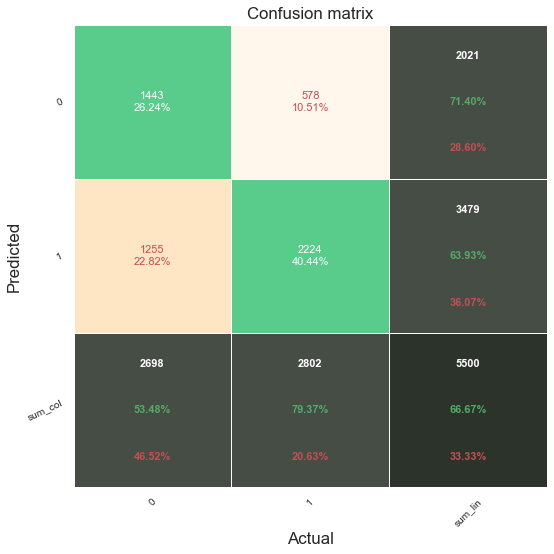

In [70]:
from pretty_confusion_matrix import pp_matrix
df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(10,7))
cmap = 'OrRd'
pp_matrix(df_cm, cmap=cmap)

In [ ]:
# #Plot Confusion Matrix
# %matplotlib inline
# class_names=[0,1] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

Variance contained in PCs:

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
PC_df = pd.DataFrame(data=pcs, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])
PC_df

Logistic Regression:

In [ ]:
X = df3[cols]
y = df2.D_follower_count
y

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=2000).fit(X_train, y_train)



In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')